In [1]:
# import packages for alpaca, panadas and OS/dotenv to read .env file with api keys
import os
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()
import pathlib as Path
#!pip install pandas-datareader
import pandas_datareader as pdr
from datetime import datetime

%matplotlib inline

In [2]:
# FOR HENNA ONLY
import os
os.chdir('/Users/hennasingh/Jupyter-Workspace/PROJECT1/Project1/notebooks')

In [3]:
# set time frame
timeframe = '1D'

# start and 'end' date for covid stock market 


start_date_covid = datetime(2017,11,1)
end_date_covid = datetime(2019,11,1)

# start and end date for 2008 recession 
start_date_2008 = datetime(2005,7,1)
end_date_2008 = datetime(2007,7,1)

# set entertainment tickers (per industry)
ent_tickers = ['IMAX','DIS','NFLX','CMCSA','SNE']
fast_food_tickers = ['MCD','WEN','YUM','DPZ','JACK']
tech_tickers = ['AMZN', 'AAPL', 'MSFT', 'GOOG', 'INTC']
tickers_travel_airline = ['EXPE','BKNG','AAL','AAP','LUV']
energy_tickers = ['XOM','BP','COP','CVX', 'TOT']

# get stock data from covid
entertainment_tickers_covid = pdr.DataReader(ent_tickers,'yahoo',start_date_covid,end_date_covid)
fastfood_tickers_covid = pdr.DataReader(fast_food_tickers,'yahoo',start_date_covid,end_date_covid)
covid_tech_ticker = pdr.DataReader(tech_tickers,'yahoo',start_date_covid,end_date_covid)
tra_air_covid_ticker = pdr.DataReader(tickers_travel_airline,'yahoo',start_date_covid,end_date_covid)
energy_covid_ticker = pdr.DataReader(energy_tickers,'yahoo',start_date_covid,end_date_covid)
sp500_covid_ticker = pdr.DataReader('^GSPC','yahoo',start_date_covid,end_date_covid)


# get stock data from 2008 recession
entertainment_tickers_2008 = pdr.DataReader(ent_tickers,'yahoo',start_date_2008,end_date_2008)
fastfood_tickers_2008 = pdr.DataReader(fast_food_tickers,'yahoo',start_date_2008,end_date_2008)
tech_ticker2008 = pdr.DataReader(tech_tickers,'yahoo',start_date_2008,end_date_2008)
tra_air_ticker2008 = pdr.DataReader(tickers_travel_airline,'yahoo',start_date_2008,end_date_2008)
energy_ticker2008 = pdr.DataReader(energy_tickers,'yahoo',start_date_2008,end_date_2008)
sp500_2008_ticker = pdr.DataReader('^GSPC','yahoo',start_date_2008,end_date_2008)



In [4]:
# create new covid and 2008 dataframe to store ckosing prices of each stock

ent_closingprices_covid = pd.DataFrame()
covid_closingprices_ff= pd.DataFrame()
covid_tech_closingprices = pd.DataFrame()
covid_travel_closingprices = pd.DataFrame()
energy_covid_closingprices = pd.DataFrame()
sp500_covid_closingprices = pd.DataFrame()

# get closing prices for all tickers (entertainment)
for ticker in ent_tickers:
    ent_closingprices_covid[ticker]=entertainment_tickers_covid['Adj Close'][ticker]

# get closing prices for all tickers (fast food)
for ticker in fast_food_tickers:
    covid_closingprices_ff[ticker]=fastfood_tickers_covid['Adj Close'][ticker]
    
# get closing prices for all tickers (tech)
for ticker in tech_tickers:
    covid_tech_closingprices[ticker]=covid_tech_ticker['Adj Close'][ticker]
    
# get closing prices for all tickers (travel)
for ticker in tickers_travel_airline:
    covid_travel_closingprices[ticker]=tra_air_covid_ticker['Adj Close'][ticker]

# get closing prices for all tickers (Energy)
for ticker in energy_tickers:
    energy_covid_closingprices[ticker]=energy_covid_ticker['Adj Close'][ticker]
    
sp500_covid_closingprices = sp500_covid_ticker['Adj Close']

# drop time component on index
ent_closingprices_covid.index = ent_closingprices_covid.index.date
covid_closingprices_ff.index = covid_closingprices_ff.index.date
covid_tech_closingprices.index = covid_tech_closingprices.index.date
covid_travel_closingprices.index = covid_travel_closingprices.index.date
energy_covid_closingprices.index = energy_covid_closingprices.index.date
sp500_covid_closingprices.index = sp500_covid_closingprices.index.date


In [5]:
ent_closingprices2008 = pd.DataFrame()
closingprices2008_ff = pd.DataFrame()
tech_closingprices2008 = pd.DataFrame()
travel_closingprices2008 = pd.DataFrame()
energy_closingprices2008 = pd.DataFrame()

# get closing prices for all tickers (entertainment)
for ticker in ent_tickers:
    ent_closingprices2008[ticker]=entertainment_tickers_2008['Adj Close'][ticker]

# get closing prices for all tickers (fast food)
for ticker in fast_food_tickers:
    closingprices2008_ff[ticker]=fastfood_tickers_2008['Adj Close'][ticker]

# get closing prices for all tickers (tech)
for ticker in tech_tickers:
    tech_closingprices2008[ticker]=tech_ticker2008['Adj Close'][ticker]
    
# get closing prices for all tickers (travel)
for ticker in tickers_travel_airline:
    travel_closingprices2008[ticker]=tra_air_ticker2008['Adj Close'][ticker]
    
# get closing prices for all tickers (energy)
for ticker in energy_tickers:
    energy_closingprices2008[ticker]=energy_ticker2008['Adj Close'][ticker]
    
sp500_2008_closingprices = sp500_2008_ticker['Adj Close']
    
# drop time component on index
ent_closingprices2008.index = ent_closingprices2008.index.date
closingprices2008_ff.index = closingprices2008_ff.index.date
tech_closingprices2008.index = tech_closingprices2008.index.date
travel_closingprices2008.index = travel_closingprices2008.index.date
energy_closingprices2008.index = energy_closingprices2008.index.date
sp500_2008_closingprices.index = sp500_2008_closingprices.index.date


In [6]:
# calculate daily returns for each timeframe (entertainment)
ent_covid_dr = ent_closingprices_covid.pct_change().dropna()
ent_returns2008 = ent_closingprices2008.pct_change().dropna()

# calculate daily returns for each timeframe (fast food)
ff_covid_dr = covid_closingprices_ff.pct_change().dropna()
ff_returns2008 = closingprices2008_ff.pct_change().dropna()

# calculate daily returns for each timeframe (fast food)
tech_covid_dr = covid_tech_closingprices.pct_change().dropna()
tech_returns2008 = tech_closingprices2008.pct_change().dropna()

# calculate daily returns for each timeframe (Travel)
travel_covid_dr = covid_travel_closingprices.pct_change().dropna()
travel_returns2008 = travel_closingprices2008.pct_change().dropna()

# calculate daily returns for each timeframe (Energy)
energy_covid_dr = energy_covid_closingprices.pct_change().dropna()
enerygy_returns2008 = energy_closingprices2008.pct_change().dropna()

# calc daily returns for SP500
covid_sp_returns = sp500_covid_closingprices.pct_change().dropna()
SP2008_returns = sp500_2008_closingprices.pct_change().dropna()

In [7]:
# optimal weights for COVID by industry
# CODE FOR ALL WEIGHT OPTIMIZATION IN INDIVIDUAL INDUSTRY NOTEBOOKS
weights_array_covid_ent = np.array([1.99037306e-04, 7.48042464e-03, 4.68559570e-01, 2.29580098e-02,5.00802959e-01])
ff_covid_weights_array = np.array([0.0081001 , 0.02144947, 0.00317154, 0.44037344, 0.52690545])
tech_covid_weights_array = np.array([0.70613507, 0.00239445, 0.13786249, 0.14385094, 0.00975704])
ta_weights_array = np.array([0.61837201, 0.18266603, 0.02917101, 0.16262027, 0.00717068])
nrg_covid_weights_array = np.array([0.00387665, 0.01551683, 0.78027557, 0.14089321, 0.05943774])

# optimal weights for 2008 by industry
weights_array_2008_ent = np.array([0.29430474, 0.16388926, 0.53320127, 0.00709684, 0.00150789])
ff_2008_weights_array = np.array([0.51671353, 0.00217503, 0.42314488, 0.04618614, 0.01178043])
tech_2008_weights_array = np.array([0.86397001, 0.02692074, 0.06883576, 0.01831173, 0.02196176])
ta_weights_2008_array = np.array([0.00441766, 0.40000322, 0.07261973, 0.51761735, 0.00534204])
nrg_2008_weights_array = np.array([0.06440511, 0.00259053, 0.00214815, 0.53930083, 0.39155538])

In [8]:
# creating weighted returns of portfolios
ent_2008_weight_ret = ent_returns2008.dot(weights_array_2008_ent)
ff_2008_weight_ret = ff_returns2008.dot(ff_2008_weights_array)
tech_2008_weight_ret = tech_returns2008.dot(tech_2008_weights_array)
trans_2008_weight_ret = travel_returns2008.dot(ta_weights_2008_array)
nrg_2008_weight_ret = enerygy_returns2008.dot(nrg_2008_weights_array)

#NOW DO COVID
ent_covid_weight_ret = ent_covid_dr.dot(weights_array_covid_ent)
ff_covid_weight_ret = ff_covid_dr.dot(ff_covid_weights_array)
tech_covid_weight_ret = tech_covid_dr.dot(tech_covid_weights_array)
trans_covid_weight_ret = travel_covid_dr.dot(ta_weights_array)
nrg_covid_weight_ret = energy_covid_dr.dot(nrg_covid_weights_array)

In [9]:
#create weighted returns dataframes
#START WITH 2008
comb_2008_df = pd.DataFrame([ent_2008_weight_ret,ff_2008_weight_ret,tech_2008_weight_ret,trans_2008_weight_ret,nrg_2008_weight_ret,SP2008_returns])
comb_2008_df = comb_2008_df.transpose()
comb_2008_df.columns = ['Entertainment', 'Fast_Food', 'Tech', 'Transportation', 'Energy', 'S&P_500']

#NOW DO COVID
comb_covid_df = pd.DataFrame([ent_covid_weight_ret,ff_covid_weight_ret,tech_covid_weight_ret,trans_covid_weight_ret,nrg_covid_weight_ret,covid_sp_returns])
comb_covid_df = comb_covid_df.transpose()
comb_covid_df.columns = ['Entertainment', 'Fast_Food', 'Tech', 'Transportation', 'Energy', 'S&P_500']

In [10]:
comb_2008_df.to_csv("../data/Clean_Data/combined_pre_2008.csv", index=False)
comb_covid_df.to_csv("../data/Clean_Data/combined_pre_covid.csv", index=False)


In [11]:
# Portfolio Variance COVID
ent_portfolio_variance_covid = np.dot(weights_array_covid_ent.T,np.dot(ent_covid_dr.cov()*252,weights_array_covid_ent))
ff_portfolio_variance_covid = np.dot(ff_covid_weights_array.T,np.dot(ff_covid_dr.cov()*252,ff_covid_weights_array))
tech_portfolio_variance_covid = np.dot(tech_covid_weights_array.T,np.dot(tech_covid_dr.cov()*252,tech_covid_weights_array))
ta_portfolio_variance_covid = np.dot(ta_weights_array.T,np.dot(travel_covid_dr.cov()*252,ta_weights_array))
nrg_portfolio_variance_covid = np.dot(nrg_covid_weights_array.T,np.dot(energy_covid_dr.cov()*252,nrg_covid_weights_array))

# Portfolio Variance 2008
ent_portfolio_variance_2008 = np.dot(weights_array_2008_ent.T,np.dot(ent_returns2008.cov()*252,weights_array_2008_ent))
ff_portfolio_variance_2008 = np.dot(ff_2008_weights_array.T,np.dot(ff_returns2008.cov()*252,ff_2008_weights_array))
tech_portfolio_variance_2008 = np.dot(tech_2008_weights_array.T,np.dot(tech_returns2008.cov()*252,tech_2008_weights_array))
ta_portfolio_variance_2008 = np.dot(ta_weights_2008_array.T,np.dot(travel_returns2008.cov()*252,ta_weights_2008_array))
nrg_portfolio_variance_2008 = np.dot(nrg_2008_weights_array.T,np.dot(enerygy_returns2008.cov()*252,nrg_2008_weights_array))


# Portfolio Volatility COVID
ent_portfolio_volatility_covid = np.sqrt(np.dot(weights_array_covid_ent.T,np.dot(ent_covid_dr.cov()*252,weights_array_covid_ent)))
ff_portfolio_volatility_covid = np.sqrt(np.dot(ff_covid_weights_array.T,np.dot(ff_covid_dr.cov()*252,ff_covid_weights_array)))
tech_portfolio_volatility_covid = np.sqrt(np.dot(tech_covid_weights_array.T,np.dot(tech_covid_dr.cov()*252,tech_covid_weights_array)))
ta_portfolio_volatility_covid = np.sqrt(np.dot(ta_weights_array.T,np.dot(travel_covid_dr.cov()*252,ta_weights_array)))
nrg_portfolio_volatility_covid = np.sqrt(np.dot(nrg_covid_weights_array.T,np.dot(energy_covid_dr.cov()*252,nrg_covid_weights_array)))

# Portfolio Volatility 2008
ent_portfolio_volatility_2008 = np.sqrt(np.dot(weights_array_2008_ent.T,np.dot(ent_returns2008.cov()*252,weights_array_2008_ent)))
ff_portfolio_volatility_2008 = np.sqrt(np.dot(ff_2008_weights_array.T,np.dot(ff_returns2008.cov()*252,ff_2008_weights_array)))
tech_portfolio_volatility_2008 = np.sqrt(np.dot(tech_2008_weights_array.T,np.dot(tech_returns2008.cov()*252,tech_2008_weights_array)))
ta_portfolio_volatility_2008 = np.sqrt(np.dot(ta_weights_2008_array.T,np.dot(travel_returns2008.cov()*252,ta_weights_2008_array)))
nrg_portfolio_volatility_2008 = np.sqrt(np.dot(nrg_2008_weights_array.T,np.dot(enerygy_returns2008.cov()*252,nrg_2008_weights_array)))

In [12]:
print(f"Entertainment Industry COVID Portfolio Variance: {round(ent_portfolio_variance_covid,3)}")

print(f"Entertainment Industry 2008 Portfolio Variance: {round(ent_portfolio_variance_2008,3)}")

print(f"Fast Food Industry 2008 Portfolio Variance: {round(ff_portfolio_variance_covid,3)}")

print(f"Fast Food Industry COVID Portfolio Variance: {round(ff_portfolio_variance_2008,3)}")

print(f"Technology Industry COVID Portfolio Variance: {round(tech_portfolio_variance_covid,3)}")

print(f"Technology Industry 2008 Portfolio Variance: {round(tech_portfolio_variance_2008,3)}")

print(f"Travel/Airlines Industry COVID Portfolio Variance: {round(ta_portfolio_variance_covid,3)}")

print(f"Travel/Airlines Industry 2008 Portfolio Variance: {round(ta_portfolio_variance_2008,3)}")

print(f"Energy Industry COVID Portfolio Variance: {round(nrg_portfolio_variance_covid,3)}")

print(f"Energy Industry 2008 Portfolio Variance: {round(nrg_portfolio_variance_2008,3)}")

Entertainment Industry COVID Portfolio Variance: 0.08
Entertainment Industry 2008 Portfolio Variance: 0.091
Fast Food Industry 2008 Portfolio Variance: 0.048
Fast Food Industry COVID Portfolio Variance: 0.031
Technology Industry COVID Portfolio Variance: 0.073
Technology Industry 2008 Portfolio Variance: 0.142
Travel/Airlines Industry COVID Portfolio Variance: 0.044
Travel/Airlines Industry 2008 Portfolio Variance: 0.058
Energy Industry COVID Portfolio Variance: 0.065
Energy Industry 2008 Portfolio Variance: 0.035


In [13]:
print(f"Entertainment Industry COVID Portfolio Volatility: {round(ent_portfolio_volatility_covid,3)}")

print(f"Entertainment Industry 2008 Portfolio Volatility: {round(ent_portfolio_volatility_2008,3)}")

print(f"Fast Food Industry 2008 Portfolio Volatility: {round(ff_portfolio_volatility_covid,3)}")

print(f"Fast Food Industry COVID Portfolio Volatility: {round(ff_portfolio_volatility_2008,3)}")

print(f"Technology Industry COVID Portfolio Volatility: {round(tech_portfolio_volatility_covid,3)}")

print(f"Technology Industry 2008 Portfolio Volatility: {round(tech_portfolio_volatility_2008,3)}")

print(f"Travel/Airlines Industry COVID Portfolio Volatility: {round(ta_portfolio_volatility_covid,3)}")

print(f"Travel/Airlines Industry 2008 Portfolio Volatility: {round(ta_portfolio_volatility_2008,3)}")

print(f"Energy Industry COVID Portfolio Volatility: {round(nrg_portfolio_volatility_covid,3)}")

print(f"Energy Industry 2008 Portfolio Volatility: {round(nrg_portfolio_volatility_2008,3)}")

Entertainment Industry COVID Portfolio Volatility: 0.283
Entertainment Industry 2008 Portfolio Volatility: 0.301
Fast Food Industry 2008 Portfolio Volatility: 0.218
Fast Food Industry COVID Portfolio Volatility: 0.176
Technology Industry COVID Portfolio Volatility: 0.271
Technology Industry 2008 Portfolio Volatility: 0.377
Travel/Airlines Industry COVID Portfolio Volatility: 0.21
Travel/Airlines Industry 2008 Portfolio Volatility: 0.24
Energy Industry COVID Portfolio Volatility: 0.255
Energy Industry 2008 Portfolio Volatility: 0.188


## Conclusions Based on Volatility and Variance
Need to add some in here

# EVERYTHING FROM HERE LOWER CONNOR ADDED ON 12.11 THIS WILL RELY ON DATA FROM THE ACTUAL RECESSIONS, UNLIKE EVERYTHING PRIOR THAT RELIED ON DATA LEADING UP TO THE RECESSIONS. IF YOU RUN CELLS BELOW THIS, THE STOCK DATA WILL BE OVERWRITTEN

In [14]:
#Pulling data 
# set time frame
timeframe = '1D'

# start and 'end' date for covid stock market 


start_date_during_covid = datetime(2019,11,1)
end_date_during_covid = datetime(2020,11,1)

# start and end date for 2008 recession 
start_date_during_2008 = datetime(2007,7,1)
end_date_during_2008 = datetime(2009,7,1)

# get stock data from covid
entertainment_tickers_during_covid = pdr.DataReader(ent_tickers,'yahoo',start_date_during_covid,end_date_during_covid)
fastfood_tickers_during_covid = pdr.DataReader(fast_food_tickers,'yahoo',start_date_during_covid,end_date_during_covid)
during_covid_tech_ticker = pdr.DataReader(tech_tickers,'yahoo',start_date_during_covid,end_date_during_covid)
tra_air_during_covid_ticker = pdr.DataReader(tickers_travel_airline,'yahoo',start_date_during_covid,end_date_during_covid)
energy_during_covid_ticker = pdr.DataReader(energy_tickers,'yahoo',start_date_during_covid,end_date_during_covid)
sp500_during_covid_ticker = pdr.DataReader('^GSPC','yahoo',start_date_during_covid,end_date_during_covid)

# get stock data from 2008 recession
entertainment_tickers_during_2008 = pdr.DataReader(ent_tickers,'yahoo',start_date_during_2008,end_date_during_2008)
fastfood_tickers_during_2008 = pdr.DataReader(fast_food_tickers,'yahoo',start_date_during_2008,end_date_during_2008)
tech_ticker_during_2008 = pdr.DataReader(tech_tickers,'yahoo',start_date_during_2008,end_date_during_2008)
tra_air_ticker_during_2008 = pdr.DataReader(tickers_travel_airline,'yahoo',start_date_during_2008,end_date_during_2008)
energy_ticker_during_2008 = pdr.DataReader(energy_tickers,'yahoo',start_date_during_2008,end_date_during_2008)
sp500_during_2008_ticker = pdr.DataReader('^GSPC','yahoo',start_date_during_2008,end_date_during_2008)

In [15]:
# create new covid and 2008 dataframe to store closing prices of each stock

ent_closingprices_during_covid = pd.DataFrame()
during_covid_closingprices_ff= pd.DataFrame()
during_covid_tech_closingprices = pd.DataFrame()
during_covid_travel_closingprices = pd.DataFrame()
energy_during_covid_closingprices = pd.DataFrame()

# get closing prices for all tickers (entertainment)
for ticker in ent_tickers:
    ent_closingprices_during_covid[ticker]=entertainment_tickers_during_covid['Adj Close'][ticker]

# get closing prices for all tickers (fast food)
for ticker in fast_food_tickers:
    during_covid_closingprices_ff[ticker]=fastfood_tickers_during_covid['Adj Close'][ticker]
    
# get closing prices for all tickers (tech)
for ticker in tech_tickers:
    during_covid_tech_closingprices[ticker]=during_covid_tech_ticker['Adj Close'][ticker]
    
# get closing prices for all tickers (travel)
for ticker in tickers_travel_airline:
    during_covid_travel_closingprices[ticker]=tra_air_during_covid_ticker['Adj Close'][ticker]

# get closing prices for all tickers (Energy)
for ticker in energy_tickers:
    energy_during_covid_closingprices[ticker]=energy_during_covid_ticker['Adj Close'][ticker]
    
# get closing prices for S&P500
sp500_during_covid_closingprices = sp500_during_covid_ticker['Adj Close']

# drop time component on index
ent_closingprices_during_covid.index = ent_closingprices_during_covid.index.date
during_covid_closingprices_ff.index = during_covid_closingprices_ff.index.date
during_covid_tech_closingprices.index = during_covid_tech_closingprices.index.date
during_covid_travel_closingprices.index = during_covid_travel_closingprices.index.date
energy_during_covid_closingprices.index = energy_during_covid_closingprices.index.date
sp500_during_covid_closingprices.index = sp500_during_covid_closingprices.index.date

In [16]:
#2008 CLOSING PRICES
ent_closingprices_during_2008 = pd.DataFrame()
closingprices_during_2008_ff = pd.DataFrame()
tech_closingprice_during_2008 = pd.DataFrame()
travel_closingprices_during_2008 = pd.DataFrame()
energy_closingprices_during_2008 = pd.DataFrame()

# get closing prices for all tickers (entertainment)
for ticker in ent_tickers:
    ent_closingprices_during_2008[ticker]=entertainment_tickers_during_2008['Adj Close'][ticker]

# get closing prices for all tickers (fast food)
for ticker in fast_food_tickers:
    closingprices_during_2008_ff[ticker]=fastfood_tickers_during_2008['Adj Close'][ticker]

# get closing prices for all tickers (tech)
for ticker in tech_tickers:
    tech_closingprice_during_2008[ticker]=tech_ticker_during_2008['Adj Close'][ticker]
    
# get closing prices for all tickers (travel)
for ticker in tickers_travel_airline:
    travel_closingprices_during_2008[ticker]=tra_air_ticker_during_2008['Adj Close'][ticker]
    
# get closing prices for all tickers (energy)
for ticker in energy_tickers:
    energy_closingprices_during_2008[ticker]=energy_ticker_during_2008['Adj Close'][ticker]
    
# get closing prices for S&P500
sp500_during_2008_closingprices = sp500_during_2008_ticker['Adj Close']
    
# drop time component on index
ent_closingprices_during_2008.index = ent_closingprices_during_2008.index.date
closingprices_during_2008_ff.index = closingprices_during_2008_ff.index.date
tech_closingprice_during_2008.index = tech_closingprice_during_2008.index.date
travel_closingprices_during_2008.index = travel_closingprices_during_2008.index.date
energy_closingprices_during_2008.index = energy_closingprices_during_2008.index.date
sp500_during_2008_closingprices.index = sp500_during_2008_closingprices.index.date

In [17]:
# calculate daily returns for each timeframe (entertainment)
ent_during_covid_dr = ent_closingprices_during_covid.pct_change().dropna()
ent_returns_during_2008 = ent_closingprices_during_2008.pct_change().dropna()

# calculate daily returns for each timeframe (fast food)
ff_during_covid_dr = during_covid_closingprices_ff.pct_change().dropna()
ff_returns_during_2008 = closingprices_during_2008_ff.pct_change().dropna()

# calculate daily returns for each timeframe (fast food)
tech_during_covid_dr = during_covid_tech_closingprices.pct_change().dropna()
tech_returns_during_2008 = tech_closingprice_during_2008.pct_change().dropna()

# calculate daily returns for each timeframe (Travel)
travel_during_covid_dr = during_covid_travel_closingprices.pct_change().dropna()
travel_returns_during_2008 = travel_closingprices_during_2008.pct_change().dropna()

# calculate daily returns for each timeframe (Energy)
energy_during_covid_dr = energy_during_covid_closingprices.pct_change().dropna()
enerygy_returns_during_2008 = energy_closingprices_during_2008.pct_change().dropna()

#calculate daily returns for each timeframe (S&P500)
sp500_during_covid_dr = sp500_during_covid_closingprices.pct_change().dropna()
sp500_during_2008_dr = sp500_during_2008_closingprices.pct_change().dropna()

In [18]:
#Calculate the weighted returns of each portfolio
#START WITH 2008
ent_d_2008_weight_ret = ent_returns_during_2008.dot(weights_array_2008_ent)
ff_d_2008_weight_ret = ff_returns_during_2008.dot(ff_2008_weights_array)
tech_d_2008_weight_ret = tech_returns_during_2008.dot(tech_2008_weights_array)
trans_d_2008_weight_ret = travel_returns_during_2008.dot(ta_weights_2008_array)
nrg_d_2008_weight_ret = enerygy_returns_during_2008.dot(nrg_2008_weights_array)

#NOW DO COVID
ent_d_covid_weight_ret = ent_during_covid_dr.dot(weights_array_covid_ent)
ff_d_covid_weight_ret = ff_during_covid_dr.dot(ff_covid_weights_array)
tech_d_covid_weight_ret = tech_during_covid_dr.dot(tech_covid_weights_array)
trans_d_covid_weight_ret = travel_during_covid_dr.dot(ta_weights_array)
nrg_d_covid_weight_ret = energy_during_covid_dr.dot(nrg_covid_weights_array)


In [19]:
#create weighted returns dataframes
#START WITH 2008
comb_d_2008_df = pd.DataFrame([ent_d_2008_weight_ret,ff_d_2008_weight_ret,tech_d_2008_weight_ret,trans_d_2008_weight_ret,nrg_d_2008_weight_ret,sp500_during_2008_dr])
comb_d_2008_df = comb_d_2008_df.transpose()
comb_d_2008_df.columns = ['Entertainment', 'Fast_Food', 'Tech', 'Transportation', 'Energy', 'S&P_500']

#NOW DO COVID
comb_d_covid_df = pd.DataFrame([ent_d_covid_weight_ret,ff_d_covid_weight_ret,tech_d_covid_weight_ret,trans_d_covid_weight_ret,nrg_d_covid_weight_ret,sp500_during_covid_dr])
comb_d_covid_df = comb_d_covid_df.transpose()
comb_d_covid_df.columns = ['Entertainment', 'Fast_Food', 'Tech', 'Transportation', 'Energy', 'S&P_500']

In [20]:
# export above data frames as csvs
comb_d_2008_df.to_csv("../data/Clean_Data/combined_d_2008.csv", index=False)
comb_d_2008_df.reset_index()
comb_d_2008_df.rename(columns={'index':'Date'})

,Entertainment,Fast_Food,Tech,Transportation,Energy,S&P_500
2007-07-03,-0.000131,0.006139,0.000401,0.006465,0.007765,0.003580
2007-07-05,0.005300,-0.001602,-0.007586,0.013022,-0.000144,0.000348
2007-07-06,0.015414,0.006103,0.002876,0.015516,0.018664,0.003304
2007-07-09,0.000829,-0.006168,0.038559,-0.006375,0.015833,0.000921
2007-07-10,0.014561,-0.019721,-0.022250,-0.033296,-0.013011,-0.014185
...,...,...,...,...,...,...
2009-06-25,0.053460,0.025374,0.034169,0.033166,0.013830,0.021444
2009-06-26,0.003411,-0.007864,0.017275,0.000114,-0.006887,-0.001478
2009-06-29,0.015891,0.002795,-0.007270,-0.006234,0.017113,0.009065
2009-06-30,-0.006152,0.002753,0.006501,-0.006402,-0.010211,-0.008531


In [21]:
comb_d_covid_df.to_csv("../data/Clean_Data/combined_d_COVID.csv", index=False)
comb_d_covid_df.reset_index()

,index,Entertainment,Fast_Food,Tech,Transportation,Energy,S&P_500
0,2019-11-04,0.010512,0.001919,0.008204,-0.011625,0.019410,0.003704
1,2019-11-05,-0.008664,0.023760,-0.001180,0.002710,0.008377,-0.001186
2,2019-11-06,-0.004919,0.000619,-0.002672,0.001655,-0.014898,0.000702
3,2019-11-07,-0.000784,0.013303,-0.000782,-0.184492,0.029152,0.002730
4,2019-11-08,0.003853,-0.007139,0.001028,0.020016,-0.006312,0.002561
...,...,...,...,...,...,...,...
246,2020-10-26,0.004167,-0.010029,-0.008070,-0.035597,-0.058467,-0.018590
247,2020-10-27,0.008793,-0.005196,0.020594,-0.032467,-0.007112,-0.003026
248,2020-10-28,0.023056,-0.033959,-0.041647,-0.036450,-0.046849,-0.035288
249,2020-10-29,0.029327,0.000183,0.017015,0.026103,0.015822,0.011947


# The above dataframes should be exported as csvs so that the below can be done in the pyviz environment

# Time for some usable data and charts

In [22]:
#TIME TO CALCULATE THE ANNUAL RISK DURING 2008
annual_risk_2008 = comb_2008_df.std() * np.sqrt(252)
annual_risk_2008 = annual_risk_2008.sort_values()
annual_risk_2008

S&P_500           0.102830
Fast_Food         0.175632
Energy            0.187644
Transportation    0.239959
Entertainment     0.300908
Tech              0.377075
dtype: float64

### In 2008, Fast Food has the highest annual risk, Energy is the most risk averse. Each industry is considered riskier than the S&P500

In [23]:
#NOW DO COVID
annual_risk_covid = comb_covid_df.std() * np.sqrt(252)
annual_risk_covid = annual_risk_covid.sort_values()
annual_risk_covid

S&P_500           0.149336
Transportation    0.210389
Fast_Food         0.218376
Energy            0.254745
Tech              0.270761
Entertainment     0.282908
dtype: float64

### During COVID times, Energy has the highest annual risk, whereas Entertainment is the most risk averse. Only Entertainment is less risky than S&P500.

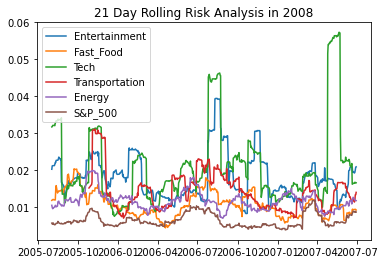

In [24]:
#Rolling 21 day risk for 2008
rolling_2008_risk21 = comb_2008_df.rolling(window=21).std()
rolling_2008_risk21.plot(title = '21 Day Rolling Risk Analysis in 2008')

### It would appear that each of these portfolios were very responsive to the S&P 500 during 2008. Especially between October of 2008 and January of 2009. Transportation, Fast Food and Entertainment all had various spikes that appear to be independent of the S&P500 though.

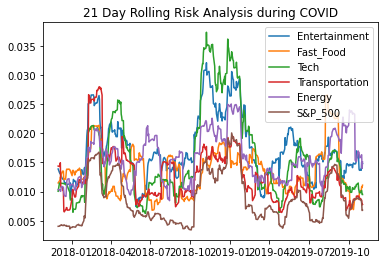

In [25]:
#Rolling 21 day risk for covid
rolling_covid_risk21 = comb_covid_df.rolling(window=21).std()
rolling_covid_risk21.plot(title = '21 Day Rolling Risk Analysis during COVID')

### Each of these industries appear to be heavily influenced by the S&P 500 during COVID. Energy, Fast Food, and Transportation all seemed to respond extremely heavily from March to May.

In [26]:
#Calculate Sharpe Ratios
#2008
sharpe_2008_rats = (comb_2008_df.mean() * 252) / (comb_2008_df.std() * np.sqrt(252))
sharpe_2008_rats = sharpe_2008_rats.sort_values()

#covid
sharpe_covid_rats = (comb_covid_df.mean() * 252) / (comb_covid_df.std() * np.sqrt(252))
sharpe_covid_rats = sharpe_covid_rats.sort_values()

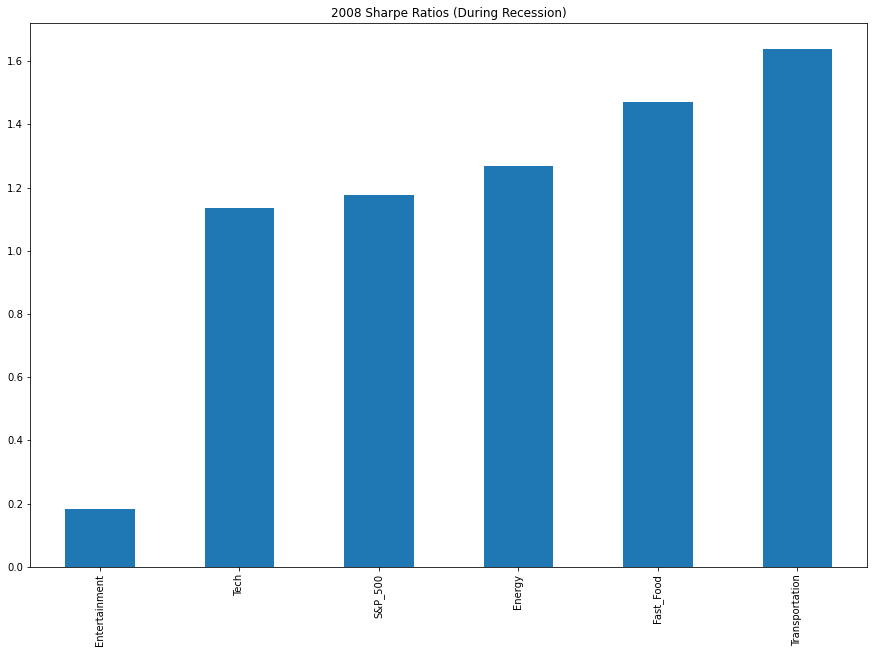

In [27]:
sharpe_2008_rats.plot(kind = 'bar', figsize = (15,10) , title = '2008 Sharpe Ratios (During Recession)')

### Every single portfolio has a better sharpe ratio than the S&P 500 during 2008. This means, the average of the returns weighted against the annualized risk were all higher for the portfolios than the S&P 500.

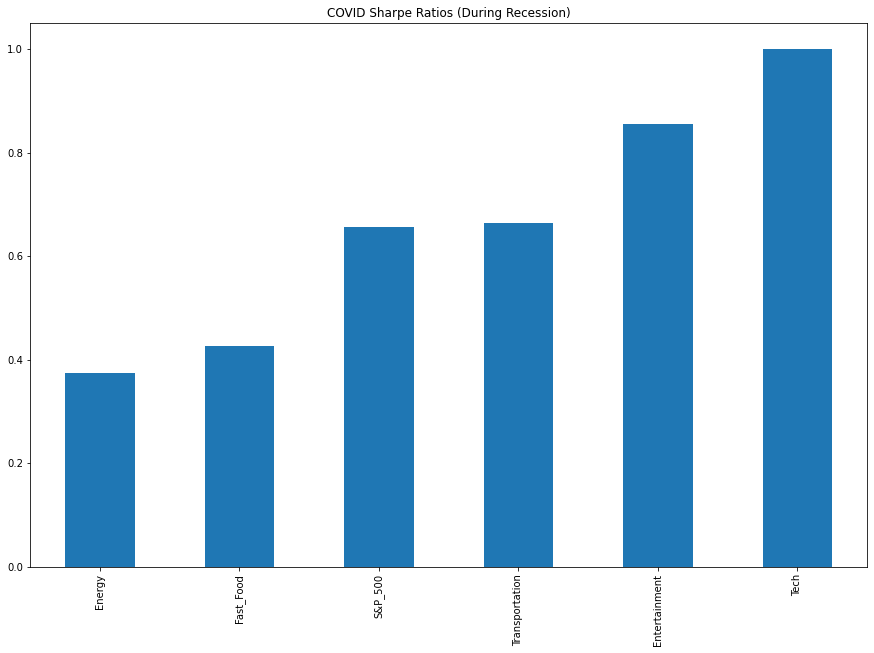

In [28]:
sharpe_covid_rats.plot(kind = 'bar', figsize = (15,10) , title = 'COVID Sharpe Ratios (During Recession)')

### Energy and Transportation have worse sharpe ratios than the S&P 500. Fast Food, Entertainment and Tech have better average returns weighted against their risk than the S&P 500.

In [29]:
#2008 CORRELATION ANALYSIS
correlation_2008 = rolling_2008_risk21.corr()
correlation_2008.style.background_gradient()

,Entertainment,Fast_Food,Tech,Transportation,Energy,S&P_500
Entertainment,1.000000,0.299888,0.372795,0.244458,-0.049862,0.159430
Fast_Food,0.299888,1.000000,0.234182,0.633373,0.264015,0.315025
Tech,0.372795,0.234182,1.000000,0.328264,-0.102012,0.115971
Transportation,0.244458,0.633373,0.328264,1.000000,0.389477,0.431875
Energy,-0.049862,0.264015,-0.102012,0.389477,1.000000,0.533483
S&P_500,0.159430,0.315025,0.115971,0.431875,0.533483,1.000000


### Energy is most responsive to the S&P 500, Entertainment is least.  Energy and transportation are fairly correlated. As are tech and energy.

In [30]:
#COVID CORRELATION ANALYSIS
correlation_covid = rolling_covid_risk21.corr()
correlation_covid.style.background_gradient()

,Entertainment,Fast_Food,Tech,Transportation,Energy,S&P_500
Entertainment,1.000000,0.244581,0.890698,0.683609,0.570246,0.825239
Fast_Food,0.244581,1.000000,0.264987,0.456793,0.191075,0.410148
Tech,0.890698,0.264987,1.000000,0.625323,0.574462,0.830614
Transportation,0.683609,0.456793,0.625323,1.000000,0.375575,0.728980
Energy,0.570246,0.191075,0.574462,0.375575,1.000000,0.720440
S&P_500,0.825239,0.410148,0.830614,0.728980,0.720440,1.000000


### Again, energy is most heavily correlated to the S&P 500, followed closely by Fast Food. Tech is the least correlated to the S&P500, but I wouldn't call it un-correlated.

# I Will pick up here with calculating and plotting betas, but it is dinner time on Friday and I am very hungry. I feel like this has given us a good starting point for Saturday.

# Should we drop this stuff guys?

In [31]:
# nrg weights array - covid

# number_ports = 100000
# nrg_covid_all_weights = np.zeros((number_ports, len(energy_covid_closingprices.columns)))
# nrg_covid_returns_array = np.zeros(number_ports)
# nrg_covid_volat_array = np.zeros(number_ports)
# nrg_covid_sharpe_array = np.zeros(number_ports)
                                 
# for index in range(number_ports):
#     weights = np.array(np.random.random(5))
#     weights = weights/np.sum(weights)
    
#     nrg_covid_all_weights[index,:] = weights
    
#     nrg_covid_returns_array[index]= np.sum((energy_covid_dr.mean()*weights)*252)
    
#     nrg_covid_volat_array[index]=np.sqrt(np.dot(weights.T, np.dot(energy_covid_dr.cov()*252, weights)))
    
#     nrg_covid_sharpe_array[index]=nrg_covid_returns_array[index]/nrg_covid_volat_array[index]
    

In [32]:
# find shape weights by index - energy covid
# nrg_covid_sharpe_array.max()

# nrg_covid_max_shape = nrg_covid_sharpe_array.argmax()
# nrg_covid_max_shape

# nrg_covid_weights_array = nrg_covid_all_weights[nrg_covid_max_shape,:]
# nrg_covid_weights_array

In [33]:
# nrg weights array - 2008

# number_ports = 100000
# nrg_2008_all_weights = np.zeros((number_ports, len(energy_closingprices2008.columns)))
# nrg_2008_returns_array = np.zeros(number_ports)
# nrg_2008_volat_array = np.zeros(number_ports)
# nrg_2008_sharpe_array = np.zeros(number_ports)
                                 
# for index in range(number_ports):
#     weights = np.array(np.random.random(5))
#     weights = weights/np.sum(weights)
    
#     nrg_2008_all_weights[index,:] = weights
    
#     nrg_2008_returns_array[index]= np.sum((enerygy_returns2008.mean()*weights)*252)
    
#     nrg_2008_volat_array[index]=np.sqrt(np.dot(weights.T, np.dot(enerygy_returns2008.cov()*252, weights)))
    
#     nrg_2008_sharpe_array[index]=nrg_2008_returns_array[index]/nrg_2008_volat_array[index]

In [34]:
# find shape weights by index - energy 2008
# nrg_2008_sharpe_array.max()

# nrg_2008_max_shape = nrg_2008_sharpe_array.argmax()
# nrg_2008_max_shape

# nrg_2008_weights_array = nrg_2008_all_weights[nrg_2008_max_shape,:]
# nrg_2008_weights_array

## volatility for 2008 & COVID
* standard deviation
* box & whisker plot?

## Industries
* Tech: AMD, AAPL, MSFT, GOOG, INTC
* Entertainment: IMAX, DIS, NFLX, CNK, SNE
* Fast Food/Restaurants: MCD, WEN, YUM, DPZ, CMG
* Energy: XOM, BP, RDS, COP, CVX
* Travel/Airlines: EXPE, BKNG, DAL, AAP, UAL